In [13]:
include("../reconstruction_probability.jl")
using LaTeXStrings, Random

In [10]:
Random.seed!(1)
M = 30
N = 20
ξ = CH.generate_patterns(M, N)
σ1, σ2, σ3 = ξ[:, 1], ξ[:, 2], ξ[:, 3]
CH.energy1(σ1, ξ; β = 10)

27.326538581358133

In [14]:
α1 = range(-1, 2, length = 150)
α2 = range(-1, 2, length = 150)

Z = zeros(length(α1), length(α2))

for i in 1:length(α1)
    a = α1[i]
    for j in 1:length(α2)
        σ_new = σ1 + a*(σ2 - σ1) + α2[j]*(σ3 -σ1)
        Z[i, j] = CH.energy1(σ_new, ξ)
    end
end

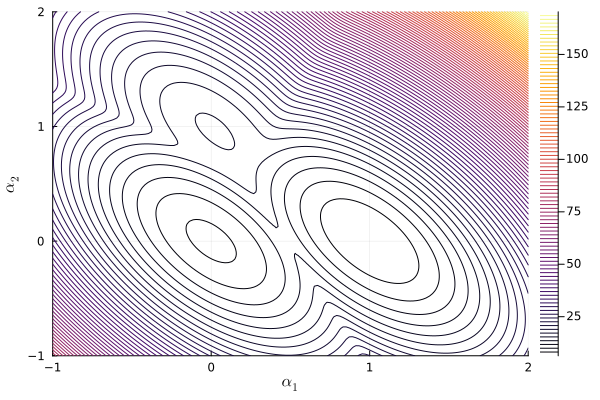

In [15]:
Plots.contour(α1, α2, Z', levels = 90, xlabel = L"α_1", ylabel = L"α_2")

In [16]:
CH.energy1(σ1, ξ)

7.704444998413974

In [17]:
CH.energy1(σ2, ξ)

6.374316938366238

In [18]:
CH.energy1(σ3, ξ)

15.15402920057053

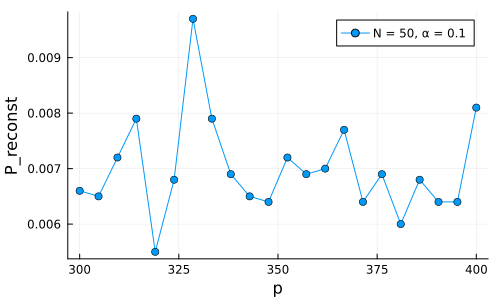

In [13]:
α = 0.1
NN = [50]
pp = range(300, 400, length = 22)

reconstruction_probability(NN::AbstractVector, α; pp = pp, β = 10, thr = 0, λ=1,
    show = true,save = false, nsamples = 10^4)

In [48]:
t = 500
distances = zeros(t)
for i in 1:t
    N = 50
    α = 0.2
    M = round(Int, exp(N * α))
    ξ = CH.generate_patterns(M, N)
    σ = ξ[:, 1]
    σ_new = CH.perturb(σ, 0.2)
    CH.distance(σ_new, σ)
    σ_rec = CH.update(σ_new, ξ; λ = 1, nsweeps = 1)
    distances[i] = CH.distance(σ_rec, σ)
end

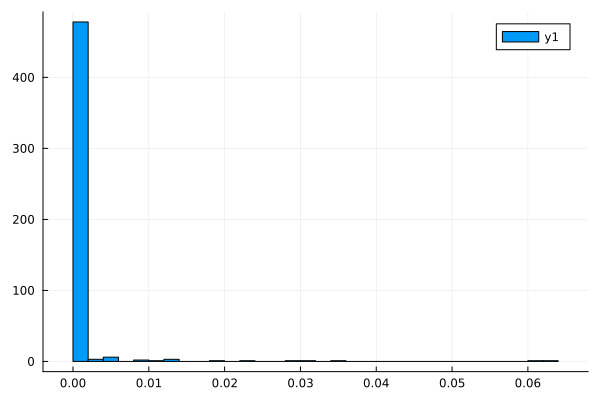

In [50]:
histogram(distances, nbins = 30)

In [39]:
distances = vec(mapslices(x -> CH.distance(σ_rec, x), ξ, dims = 1) )

22026-element Vector{Float64}:
 7.56235862911126
 6.893492670794616
 7.496457509745155
 7.095464936117243
 7.353094740590584
 9.031986774817257
 7.7711299123157005
 6.991529549504285
 8.661803057708612
 8.048242143470459
 7.6940573711835825
 7.925504849902807
 7.723156171632238
 ⋮
 7.410676976080928
 7.220196005786311
 7.851575282797357
 7.544476718124351
 8.14307991208461
 7.622147618178268
 6.971420864819807
 7.450765379067196
 8.72459328723952
 7.5723449944526084
 7.827758619440816
 8.484451045861126

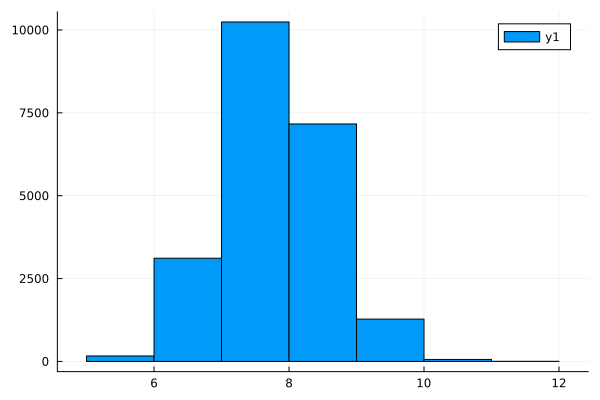

In [40]:
histogram(distances, nbins = 6)

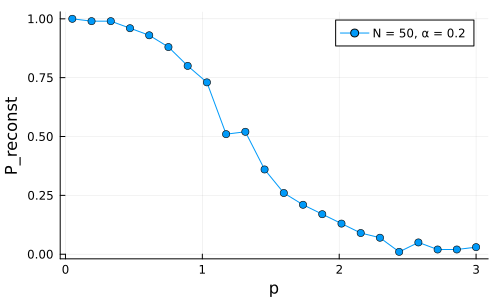

 21.659550 seconds (56.24 k allocations: 19.505 GiB, 13.61% gc time, 0.13% compilation time)


In [54]:
NN = [50]
α = 0.2
nsamples = 100
pp::AbstractVector = range( 0.05, 3, length = 22 )
λ = 1
@time reconstruction_probability(NN, α; pp = pp, nsamples = nsamples, λ = λ, save = false, show = true, thr = 0.05)
